# 1. Business Understanding
## 1.1 Background

Semiconductor manufacturing is a highly complex and capital-intensive process involving hundreds of fabrication steps that must be performed with extreme precision.

Even microscopic defects introduced during wafer processing can lead to complete product failure, reducing manufacturing yield and increasing production costs.


Traditionally, quality control in semiconductor fabrication has relied on manual inspection and rule-based systems, which are time-consuming, subjective, and often unable to keep up with modern production speeds.

In recent years, semiconductor companies such as Intel, TSMC, and Samsung,Nvidia have shifted toward AI-driven defect detection systems to improve yield prediction, defect localization, and root-cause analysis.

Leveraging machine learning and computer vision, these systems can detect defect patterns directly from wafer map images, enabling earlier and more accurate interventions in the production line.

## 1.2 Problem Statement

Manufacturers need an efficient and automated method to identify and classify wafer defects early in the production process.

Manual inspection systems fail to scale with high-volume production and cannot accurately identify subtle, complex defect patterns.

Therefore, the goal is to develop a machine learning-based image analysis model capable of automatically detecting and classifying defect patterns in wafer maps therefore improving yield, reducing inspection time, and minimizing production losses.

## 1.3 Business Objective

The primary business objective is to enhance production efficiency and quality assurance in semiconductor manufacturing by automating defect detection.

The system will:

- Identify wafer defect types using image-based pattern recognition.

- Support process engineers in diagnosing the root cause of production faults.

- Reduce manual inspection time and related operational costs.

- Improve yield rate and product reliability.

Ultimately, the project aims to demonstrate how AI-based defect detection can improve decision-making, reduce downtime, and ensure data-driven manufacturing optimization.

## 1.4 Project Goal

To build and deploy a deep learning-based image classification model capable of identifying common wafer defect patterns (e.g., center, edge-ring, scratch, random) using the WM811K dataset. The model’s predictions will be integrated into an interactive Streamlit dashboard, allowing users to:

- Upload wafer map images,
- 
- View real-time defect classification and confidence levels, and
- 
- Visualize feature importance or activation maps (Grad-CAM) for interpretability.

## 1.5 Expected Business Impact

- `Operational Efficiency:`	Faster and more accurate defect detection compared to manual methods.
- 
- `Cost Reduction:`	Reduced labor costs and fewer defective chips reaching final testing.
- 
- `Quality Improvement:` Early detection minimizes yield loss and improves product reliability.
- 
- `Decision Support:`	Data-driven insights for process optimization and predictive maintenance.
- 
- `Scalability:`	System can be integrated into production pipelines and scaled to new wafer types.
## 1.6 Success Metrics

- Accuracy / F1 Score of classification model 

- Reduction in defect inspection time by .

- Improved detection of rare defect patterns (using confusion matrix or recall metrics).

- Usability feedback from engineers or end-users on the Streamlit dashboard prototype.

## 1.7 Data Understanding

The goal is to Describe the origin and nature of the data.

**Data Source**

**Data Volume** : The dataset has **811,457** ROWS and **6** COLUMNS .
This allows substantial pattern detection

**Data Features**:
1. **dieSize**: Numeric, possibly indicating chip dimensions.

2. **failureType**: Categorical or missing, representing defect type.

3. **lotName**: Identifier for production batch.

4. **trainTestLabel**: Indicates whether the row is for training or testing.

5. **waferIndex**: Numeric, likely a position or ID.

6. **waferMap**: A 2D array representing the wafer layout and defect positions.

## Data Loading and Reading of the file

In [1]:
# import pandas as pd 
import pandas as pd
# import numpy as np
import numpy as np

df = pd.read_pickle("WM811K_fixed.pkl")
# review the top 5 rows of the file
df.head()

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,1683.0,none,lot1,Training,1.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1683.0,none,lot1,Training,2.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1683.0,none,lot1,Training,3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1683.0,none,lot1,Training,4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1683.0,none,lot1,Training,5.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Data Understanding And Description

The objective is to have a general understnading of our data .
We inspect various aspects such as 

1. Data Dimensionality : Understanding the number of rows and columns
2. Data types
3. Concise data summary
4. Checking for missing values
5. checking for duplicates 

In [2]:
# checking for data structure / dimensions 
df.shape

(811457, 6)

##### 
Data has a total of :

**rows** = 811,457
**columns** = 6

In [3]:
# checking for column names 
df.columns.tolist()

['dieSize',
 'failureType',
 'lotName',
 'trainTestLabel',
 'waferIndex',
 'waferMap']

In [4]:
#checking data summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         811457 non-null  float64
 1   failureType     811457 non-null  object 
 2   lotName         811457 non-null  object 
 3   trainTestLabel  811457 non-null  object 
 4   waferIndex      811457 non-null  float64
 5   waferMap        811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


####

. **Data Integrity** : No missing values across any column

. **Data Types** :

float64: Numerical features -- dieSize,waferIndex

objectL: Categorical / encoded features -- failureType,LotName

In [5]:
# check for missing values 
df.isnull()

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
811452,False,False,False,False,False,False
811453,False,False,False,False,False,False
811454,False,False,False,False,False,False
811455,False,False,False,False,False,False


### 
**Missingness** :

1. True = 1
2. False = 0

In [6]:
# missing values sum 
df.isnull().sum()

dieSize           0
failureType       0
lotName           0
trainTestLabel    0
waferIndex        0
waferMap          0
dtype: int64

####
No missing Values across the features 

## Data Cleaning And Duplicate check

Before analyzing or sampling the semiconductor wafer dataset, we ensure that all metadata columns (non-image fields) are clean, scalar, and free from duplicates.


This step helps avoid issues caused by array-like or mixed-type values, which can interfere with grouping, deduplication, and modeling later.

#### 
1. Data Type Standardization:
   To ensure consistency and compatibility across operations , all metadata columns are explicirtly cast to appropriate types

2. Unhashable Type Detection

Before checking for duplicates , we verify that no metadata columns contains unhashable types (e.g , lists or arrays)

3. Flattening Array-Like Values
Any array-like entries in metadata columns are flattened to scalar values

4. Duplicate check (excluding waferMap)
Since waferMap contains unhashable 2D arrays , it is excluded from the duplicate check

In [7]:
# Ensure all metadata columns are safe types
df["dieSize"] = df["dieSize"].astype(float)
df["failureType"] = df["failureType"].astype(str)
df["lotName"] = df["lotName"].astype(str)
df["trainTestLabel"] = df["trainTestLabel"].astype(str)
df["waferIndex"] = df["waferIndex"].astype(float)

# Exclude waferMap and wafer_map_str when checking duplicates
metadata_cols = ["dieSize", "failureType", "lotName", "trainTestLabel", "waferIndex"]

# Check for unhashable values just in case
for col in metadata_cols:
    bad = df[col].apply(lambda x: isinstance(x, (list, np.ndarray))).sum()
    print(f"{col}: {bad} array-like values")

# Flatten any array-like metadata values
for col in metadata_cols:
    df[col] = df[col].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)

# safely check for duplicates based only on metadata

dup_count = df.duplicated(subset=metadata_cols).sum()
print(f"Duplicate rows (excluding waferMap): {dup_count}")

dieSize: 0 array-like values
failureType: 0 array-like values
lotName: 0 array-like values
trainTestLabel: 0 array-like values
waferIndex: 0 array-like values
Duplicate rows (excluding waferMap): 0


In [8]:
# Filter duplicate rows based on metadata
dup_rows = df[df.duplicated(subset=metadata_cols, keep=False)]

# Group and count duplicates
summary = (
    dup_rows.groupby(['failureType', 'lotName'])
    .size()
    .reset_index(name='duplicate_count')
    .sort_values(by='duplicate_count', ascending=False)
)

print(summary)


Empty DataFrame
Columns: [failureType, lotName, duplicate_count]
Index: []


####

No duplicate values 

## Class Imbalance Check

**Objective**:
Before modeling , we assess whether the target variable **failureType** is imbalanced . 

Class Imbalance can **bias models** towardsmajority classes , reducing performance on minority classes .

In [9]:
df["failureType"].value_counts().head()

failureType
[0 0]        638507
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Name: count, dtype: int64

####
class [0 0] is the dominant class with 638,507 samples followed by **none** with 147,431 samples 

There is a significant class imbalance 

Imbalanced data can lead to :

1. Biased predictions toward majority class
2. 
3. Poor recall/precision for minority classes
4. 
5. Misleading accuracy scores

failureType
[0 0]        638507
none         147431
Edge-Ring      9680
Edge-Loc       5189
Center         4294
Loc            3593
Scratch        1193
Random          866
Donut           555
Near-full       149
Name: count, dtype: int64


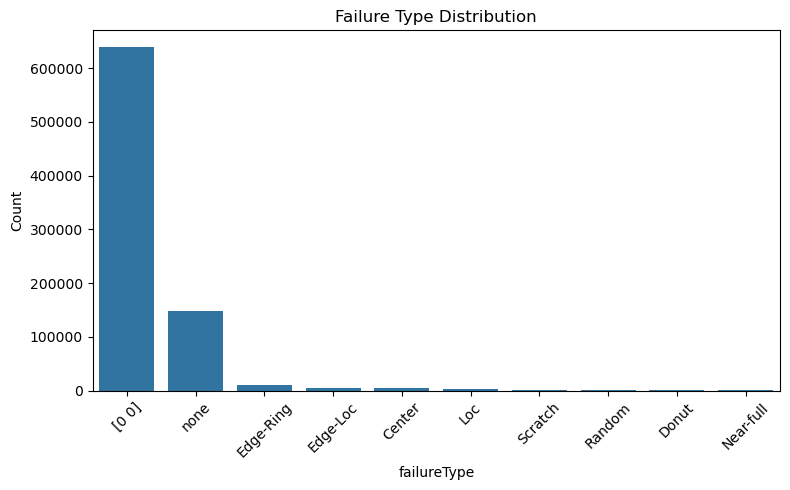

In [10]:
# Count occurrences of each class
class_counts = df['failureType'].value_counts()
print(class_counts)

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Failure Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Create a Blanced 300k Sample

This is to make the dataset easier to handle and consistent processing speed . 

We created 300,000 row sample from 800,000 row data that preserves the original **train/test ratio**

This approach guarantees that both training and testing subsets remain well represented in the sample avoiding sampling bias 

In [11]:
# Create a balanced 300k sample (if you want to maintain train/test ratio)
df_sample = (
    df.groupby("trainTestLabel", group_keys=False)
      .apply(lambda x: x.sample(frac=300_000/len(df), random_state=42))
      .reset_index(drop=True)
)

df_sample.to_pickle("WM811K_sample.pkl")
print(f" Sample saved: WM811K_sample.pkl with {len(df_sample)} rows")

C:\Users\Zbook\AppData\Local\Temp\ipykernel_6540\1731451845.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=300_000/len(df), random_state=42))


 Sample saved: WM811K_sample.pkl with 299999 rows


## MODELING

**OBJECTIVE**:
Build and compare classification models (Logistic Regression and RandomForest).

Aim is to predict **failureType** from wafer map data

Address class imbalance using **SMOTE**

**Workflow Summary**

Feature Preparation: Flattened waferMap arrays into 1D vectors.

Label Encoding: Converted failureType to categorical codes.

Train-Test Split: Stratified split to preserve class proportions.

SMOTE Resampling: Applied to training set to balance class distribution.

Model Training: Logistic Regression with class_weight='balanced'.

Evaluation: Used classification_report to assess precision, recall, and F1-score.

In [15]:
# Resize All Maps to A Common Shape
from skimage.transform import resize
import numpy as np

# choose a target shape 
target_shape = (32,32)
def resize_map(map_array):
    return resize(map_array,target_shape,anti_aliasing=True)

# Apply resizing
df_sample["waferMap_resized"] = df_sample["waferMap"].apply(resize_map)



# convert waferMap arrays to flattened vectors
X = np.stack(df_sample["waferMap_resized"].values).reshape(len(df_sample),-1)
y = df_sample["failureType"].astype("category").cat.codes # encode labels
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,stratify=y,random_state=42
)

# Apply smote to Training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore",category=ConvergenceWarning)

# initiate logistic regression 

logReg = LogisticRegression(
    solver="saga",max_iter=300,class_weight="balanced")
# fit the model
logReg.fit(X_train_resampled,y_train_resampled)

# predict on the test set
y_pred = logReg.predict(X_test)

print("LogisticRegression Results:")
print(classification_report(y_test,y_pred))

LogisticRegression Results:
              precision    recall  f1-score   support

           0       0.13      0.83      0.22       305
           1       0.30      0.98      0.46        44
           2       0.05      0.67      0.09       386
           3       0.36      0.87      0.51       704
           4       0.04      0.28      0.07       269
           5       0.07      1.00      0.13        13
           6       0.09      0.88      0.17        65
           7       0.00      0.25      0.00        93
           8       0.93      0.40      0.56     47212
           9       0.50      0.58      0.54     10909

    accuracy                           0.44     60000
   macro avg       0.25      0.67      0.27     60000
weighted avg       0.83      0.44      0.55     60000



### 
**Observations**

1. Overall Accuracy : **44%**
2. 
3. Weighted F1-score:0.55 -- Accounts for class imbalance and gives a better sense of real-world performance.
4. 
5. Macro F1-score:0.27 -- Shows that performance across classes is uneven , with similar classes struggling.
6. 

The model is biased towards majority classes despite class_weight="balanced"

Recall is generally high, meaning the model is good at catching positives, but precision suffers , especially for rare classes

### 

**OBJECTIVE 2** : RandomForest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(
    n_estimators=100,class_weight="balanced",random_state=42,n_jobs=-1)
random_forest.fit(X_train_resampled,y_train_resampled)

# predict on test features
y_pred_random_forest = random_forest.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test,y_pred_random_forest))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.64      0.44      0.52       305
           1       0.78      0.57      0.66        44
           2       0.63      0.17      0.27       386
           3       0.76      0.83      0.79       704
           4       0.58      0.11      0.19       269
           5       1.00      0.31      0.47        13
           6       0.54      0.23      0.32        65
           7       1.00      0.04      0.08        93
           8       0.96      0.94      0.95     47212
           9       0.77      0.90      0.83     10909

    accuracy                           0.92     60000
   macro avg       0.77      0.45      0.51     60000
weighted avg       0.92      0.92      0.91     60000



###
**OBservations**

Accuracy score : **92%**
Weighted F1-score shows a consistent performance across all samples , even with imbalance

Macro F1-score still modest , but much better , indicating improved handling of minority classes 

**Class-Level Highlights**

Class 8 (majority class): Precision and recall both near-perfect (0.96 / 0.94).

Class 9: Strong precision and recall (0.77 / 0.90).

Minority classes (0–7):

Precision is often high (e.g., class 5 and 7 at 1.00), but recall is low — suggesting the model is cautious and only predicts these when highly confident.

Class 3 stands out with solid balance (F1 = 0.79).

**NOTE**
Random Forest handles nonlinear patterns and class imbalance far better than Logistic Regression.

Rare classes are still tricky, but the model is making smarter predictions — fewer false positives, more confident hits.

SMOTE + class_weight="balanced" + tree-based model is a powerful combo for this wafer failure classification task.

In [22]:
import pandas as pd

summary_data = {
    "Metric": ["Accuracy", "Weighted F1-score", "Macro F1-score"],
    "Logistic Regression": [0.44, 0.55, 0.27],
    "Random Forest": [0.92, 0.91, 0.51]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)


              Metric  Logistic Regression  Random Forest
0           Accuracy                 0.44           0.92
1  Weighted F1-score                 0.55           0.91
2     Macro F1-score                 0.27           0.51


### Confusion Matrix Visualization

Plot confusion matrices for both models to see:

1. Which classes are being confused
2. How well minority classes are handled
3. Whether Random Forest reduces false positives/negatives 

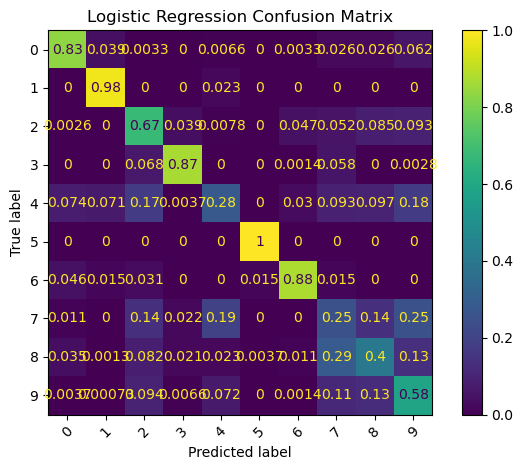

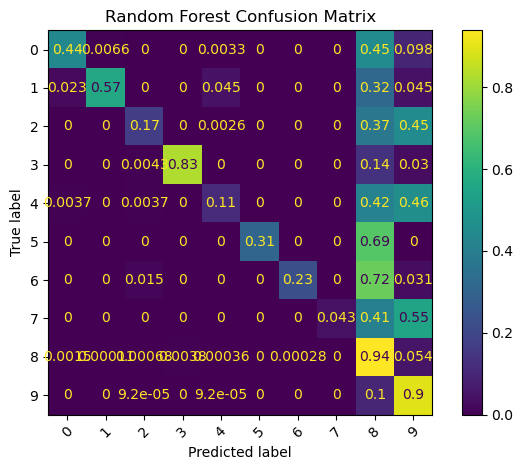

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.title("Logistic Regression Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_random_forest, normalize='true')
plt.title("Random Forest Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####
 **Business Interpretation**
 
**Summarize:**

Logistic Regression: Simpler, faster, but struggles with nonlinear patterns and minority classes.

Random Forest: Slower to train, but far superior in accuracy, balance, and interpretability via feature importance.